# Visualization Exercise Sheet

----------------------------------------------------------

In these short questions we will have you work with data from the GALAH spectroscopic survey (https://www.galah-survey.org) of stars in the Milky Way disk, and practice some visualization techniques to help analyze trends in the data.

You will find helpful documentation and examples to help you make the plots at the following graph galleries.
https://python-graph-gallery.com

https://matplotlib.org/stable/plot_types/index.html

**Download the data file 'galahamr.sav' located in the Moodle exercises page, which contains measurements of physical properties of ~7000 nearby stars.**

In [124]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

In [125]:
#Read in data set
from scipy.io import readsav
filepath = 'galahamr.sav'  #change this to the path on your computer where the file is stored
stars = readsav(filepath)  

In [126]:
#Pull out some attributes of the stars we want to look at and store them in arrays
logg = stars['f']['logg']  #surface gravity   
teff = stars['f']['teff']  #effective temperature
mass = stars['f']['massmean']  #mass
lum = mass**4.  #luminosity for stars 0.43 < Msun < 2
age = stars['f']['agemean'] #age
feh = stars['f']['__fe_h_'] #[Fe/H], a logarithmic Iron abundance
afe = stars['f']['__alpha_fe_']  #[Alpha/Fe], logarithmic relative abundance of alpha elements(O, Si, etc.) relative to Iron

### 1) Consider one version of the Hertzsprung-Russell diagram using effective temperature and surface gravity of the stars ( $T_{eff}$, log(g) ).  Make two types of plots of the stars, with clearly labeled axes and colorbars where suitable: 
* a) a scatter plot with the points colored by age 
* b) a 2D density plot using, e.g. the **kde** package along with the **pcolormesh** routine in matplotlib; or hist2d within matplotlib

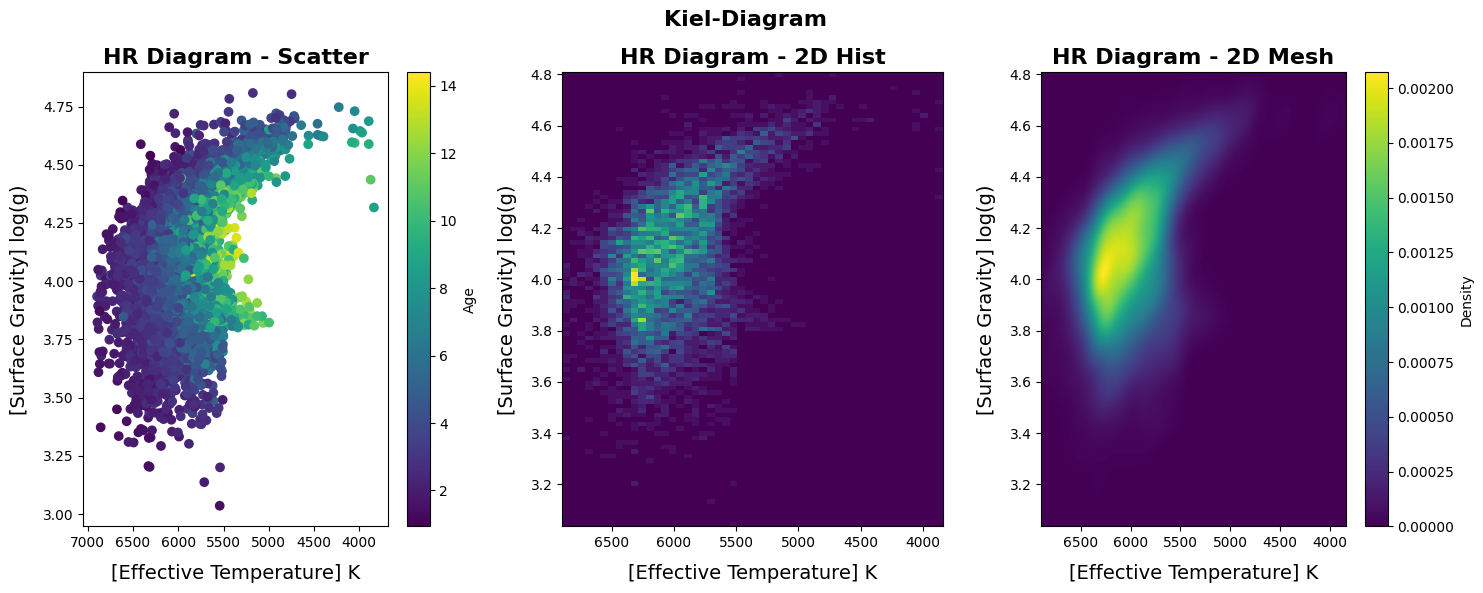

In [127]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(15, 6))
scatter = ax1.scatter(teff, logg, c=age, cmap='viridis')
ax1.set_xlabel('[Effective Temperature] K', fontsize = 14, labelpad = 10)
ax1.set_ylabel('[Surface Gravity] log(g)', fontsize = 14, labelpad = 10)
ax1.set_title("HR Diagram - Scatter", fontsize = 16, weight = "bold")
fig.colorbar(scatter, ax=ax1, label="Age")
ax1.invert_xaxis() 


hist = ax2.hist2d(teff, logg, bins=[50, 100])
ax2.set_xlabel("[Effective Temperature] K", fontsize = 14, labelpad = 10)
ax2.set_ylabel("[Surface Gravity] log(g)", fontsize = 14, labelpad = 10)
ax2.set_title("HR Diagram - 2D Hist", fontsize = 16, weight = "bold")
#fig.colorbar(hist, ax=ax2, label="Density")
ax2.invert_xaxis()


bins = 200j
xedge, yedge = np.mgrid[teff.min():teff.max():bins, logg.min():logg.max():bins]
kde = gaussian_kde([teff, logg])
h = kde(np.vstack([xedge.ravel(), yedge.ravel()]))
z = h.reshape(xedge.shape)
pcm = ax3.pcolormesh(xedge, yedge, z, cmap='viridis', norm=plt.Normalize(), shading='gouraud')
ax3.set_xlabel("[Effective Temperature] K", fontsize = 14, labelpad = 10)
ax3.set_ylabel("[Surface Gravity] log(g)", fontsize = 14, labelpad = 10)
ax3.set_title("HR Diagram - 2D Mesh", fontsize = 16, weight = "bold")
fig.colorbar(pcm, ax=ax3, label="Density")
ax3.invert_xaxis() 


fig.suptitle("Kiel-Diagram", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

### 2) Use a built-in, or hand-written routine to compute the running average of $T_{eff}$ as a function of $log(g)$.  Overplot this average approximation to the distribution of stars.  It should roughly subdivide the sample into cooler and hotter stars at a given value of $log(g)$.

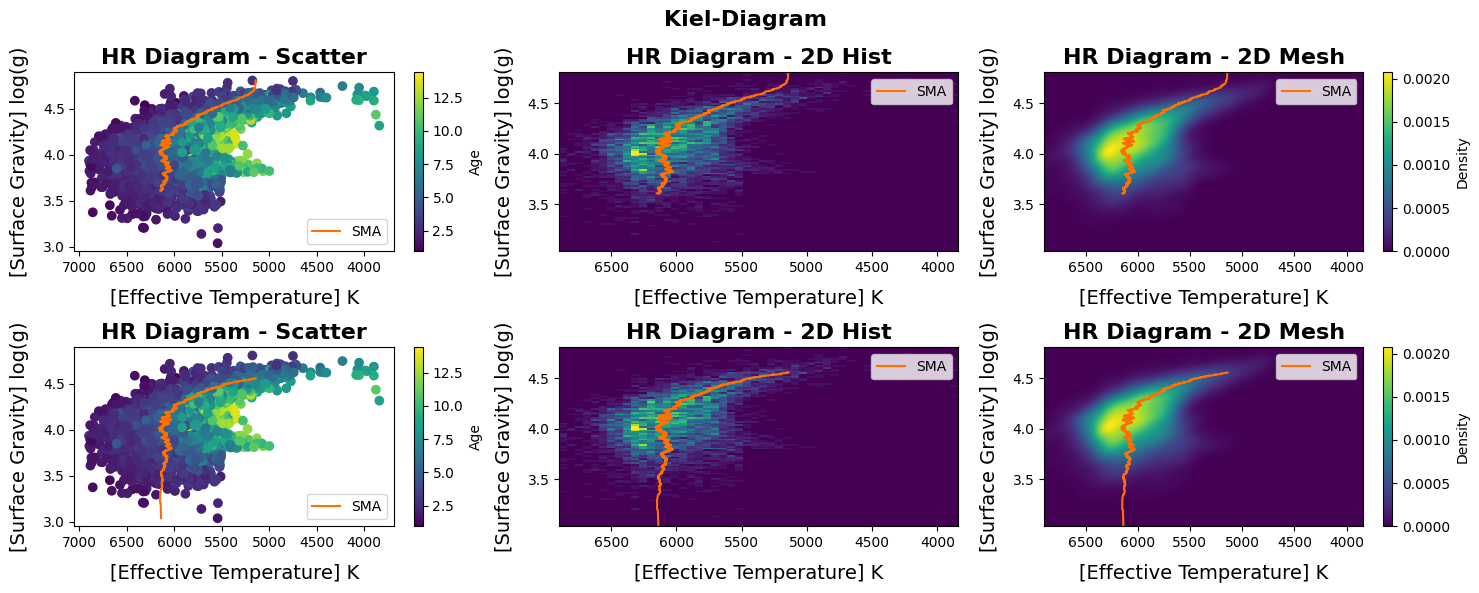

In [128]:
stepSize = 200

idx = np.argsort(logg)

#Variant 1 in Scatter plot
SMA = pd.DataFrame(columns=['teff', 'logg'])
SMA['teff'] = teff[idx] + 0
SMA['logg'] = logg[idx] + 0
SMA['teff'] = SMA['teff'].rolling(stepSize).mean()

#Variant 2 without Pandas in mesh
def sma(x, y, stepSize=100):
    n = np.convolve(x[idx], np.ones(stepSize), 'valid')
    avgX = np.divide(n, stepSize)
    avgY = y[idx][:len(avgX)]
    return [avgX, avgY]

avgTeff, avgLogg = sma(teff, logg, stepSize)


fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(15, 6))

scatter = ax1.scatter(teff, logg, c=age, cmap='viridis')
ax1.set_xlabel('[Effective Temperature] K', fontsize = 14, labelpad = 10)
ax1.set_ylabel('[Surface Gravity] log(g)', fontsize = 14, labelpad = 10)
ax1.set_title("HR Diagram - Scatter", fontsize = 16, weight = "bold")
fig.colorbar(scatter, ax=ax1, label="Age")
ax1.invert_xaxis() 


hist = ax2.hist2d(teff, logg, bins=[50, 100])
ax2.set_xlabel("[Effective Temperature] K", fontsize = 14, labelpad = 10)
ax2.set_ylabel("[Surface Gravity] log(g)", fontsize = 14, labelpad = 10)
ax2.set_title("HR Diagram - 2D Hist", fontsize=16, weight="bold")
#fig.colorbar(hist, ax=ax2, label="Density")
ax2.invert_xaxis()


bins = 200j
xedge, yedge = np.mgrid[teff.min():teff.max():bins, logg.min():logg.max():bins]
kde = gaussian_kde([teff, logg])
h = kde(np.vstack([xedge.ravel(), yedge.ravel()]))
z = h.reshape(xedge.shape)
pcm = ax3.pcolormesh(xedge, yedge, z, cmap='viridis', norm=plt.Normalize(), shading='gouraud')
ax3.set_xlabel("[Effective Temperature] K", fontsize=14, labelpad=10)
ax3.set_ylabel("[Surface Gravity] log(g)", fontsize=14, labelpad=10)
ax3.set_title("HR Diagram - 2D Mesh", fontsize=16, weight="bold")
fig.colorbar(pcm, ax=ax3, label="Density")
ax3.invert_xaxis() 



scatter = ax4.scatter(teff, logg, c=age, cmap='viridis')
ax4.set_xlabel('[Effective Temperature] K', fontsize = 14, labelpad = 10)
ax4.set_ylabel('[Surface Gravity] log(g)', fontsize = 14, labelpad = 10)
ax4.set_title("HR Diagram - Scatter", fontsize = 16, weight = "bold")
fig.colorbar(scatter, ax=ax4, label="Age")
ax4.invert_xaxis() 


hist = ax5.hist2d(teff, logg, bins=[50, 100])
ax5.set_xlabel("[Effective Temperature] K", fontsize = 14, labelpad = 10)
ax5.set_ylabel("[Surface Gravity] log(g)", fontsize = 14, labelpad = 10)
ax5.set_title("HR Diagram - 2D Hist", fontsize=16, weight="bold")
#fig.colorbar(hist, ax=ax5, label="Density")
ax5.invert_xaxis()


bins = 200j
xedge, yedge = np.mgrid[teff.min():teff.max():bins, logg.min():logg.max():bins]
kde = gaussian_kde([teff, logg])
h = kde(np.vstack([xedge.ravel(), yedge.ravel()]))
z = h.reshape(xedge.shape)
pcm = ax6.pcolormesh(xedge, yedge, z, cmap='viridis', norm=plt.Normalize(), shading='gouraud')
ax6.set_xlabel("[Effective Temperature] K", fontsize=14, labelpad=10)
ax6.set_ylabel("[Surface Gravity] log(g)", fontsize=14, labelpad=10)
ax6.set_title("HR Diagram - 2D Mesh", fontsize=16, weight="bold")
fig.colorbar(pcm, ax=ax6, label="Density")
ax6.invert_xaxis() 


ax1.plot(SMA['teff'], SMA['logg'], c='#FF7000', label='SMA')
ax1.legend()
ax2.plot(SMA['teff'], SMA['logg'], c='#FF7000', label='SMA')
ax2.legend()
ax3.plot(SMA['teff'], SMA['logg'], c='#FF7000', label='SMA')
ax3.legend()
ax4.plot(avgTeff, avgLogg, c='#FF7000', label='SMA')
ax4.legend()
ax5.plot(avgTeff, avgLogg, c='#FF7000', label='SMA')
ax5.legend()
ax6.plot(avgTeff, avgLogg, c='#FF7000', label='SMA')
ax6.legend()
fig.suptitle("Kiel-Diagram", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

### 3) [OPTIONAL]  Compute the mean and standard deviation ($\sigma$) of the ages of the cool and hot star sub-samples

* What percent of stars have an age that is within $1-\sigma$ of the mean ages of *both* the cool and hot star sub-samples?  e.g., the fraction of stars that have ages within
 
$(mean(age_{hot}) +\sigma(age_{hot}))$ $\leq age \leq$ $(mean(age_{cool}) -\sigma(age_{cool}))$

In [145]:
cold = [a for a, b in zip(teff, avgTeff) if a <= b]
hot = [a for a, b in zip(teff, avgTeff) if a >= b]

tempAge_lookup = {t: a for t, a in zip(teff, age) }

tempAgeCold = [tempAge_lookup[temp] for temp in cold if temp in tempAge_lookup]
tempAgeHot = [tempAge_lookup[temp] for temp in hot if temp in tempAge_lookup]

meanAge_cold = np.mean(tempAgeCold)
stdAge_cold = np.std(tempAgeCold)
meanAge_hot = np.mean(tempAgeHot)
stdAge_hot = np.std(tempAgeHot)

withinSigma_cold = (age >= (meanAge_cold - stdAge_cold)) & (age <= (meanAge_cold + stdAge_cold))
withinSigma_hot = (age >= (meanAge_hot - stdAge_hot)) & (age <= (meanAge_hot + stdAge_hot))
withinSigma_both = withinSigma_cold & withinSigma_hot
percentWithinSigma_both = np.sum(withinSigma_both) / len(age) * 100

print(f"{"Cool Stars"}  |  {"Hot Stars"}")
print(f"{"[Mean age] Gyr: "} {meanAge_cold:.2f}  |  {meanAge_hot:2f}")
print(f"{"[Standard deviation] Gyr: "} {stdAge_cold:.2f}  |  {stdAge_hot:2f}")
print(f"{"Percent within 1σ of both means: "} {percentWithinSigma_both:.2f}%")



Cool Stars  |  Hot Stars
[Mean age] Gyr:  6.41  |  3.966800
[Standard deviation] Gyr:  2.43  |  1.645375
Percent within 1σ of both means:  26.44%


### 4) Create two versions of a *weighted* 2D density distribution of the sample of stars in the plane of **[Fe/H]** as a function of **age**:
* a) One where the density distribution is weighted by the mass of the stars
* b) One where the density distribution is weighted by the luminosity of the stars

Compute the weighted average metallicity and age for both cases and indicate them on the density distributions.

C:\Users\Julian\AppData\Local\Temp\ipykernel_25436\1043164310.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax1.plot(avgAge_mass, avgFe_mass, "ro", markersize=10, c='#FF7000')
C:\Users\Julian\AppData\Local\Temp\ipykernel_25436\1043164310.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(avgAge_lum, avgFe_lum, "ro", markersize=10, c='#FF7000')


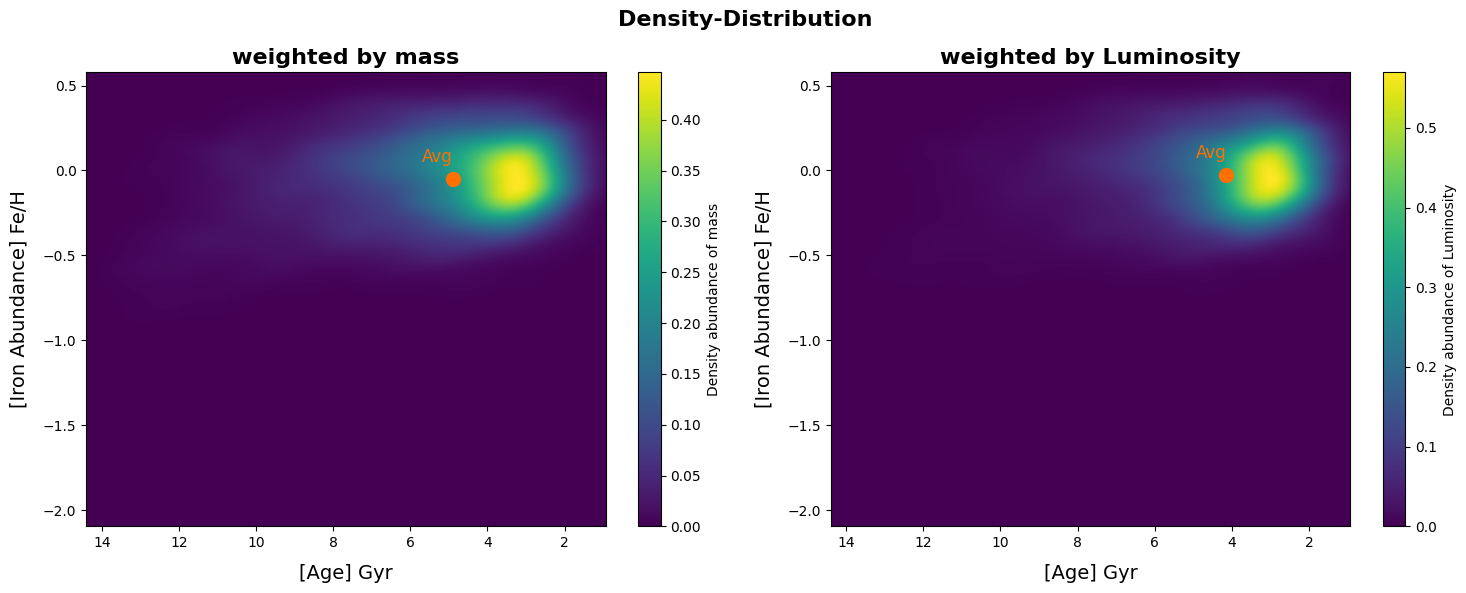

Average weighted by Mass: (4.89/-0.05) 
 Average weighted by luminosity: (4.15/-0.03)


In [97]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 6))

bins = 200j
xedge, yedge = np.mgrid[age.min():age.max():bins, feh.min():feh.max():bins]
kde = gaussian_kde([age, feh], weights=mass)
h = kde(np.vstack([xedge.ravel(), yedge.ravel()]))
z = h.reshape(xedge.shape)
pcm = ax1.pcolormesh(xedge, yedge, z, cmap='viridis', norm=plt.Normalize(), shading='gouraud')
avgAge_mass = np.average(age, weights=mass)
avgFe_mass = np.average(feh, weights=mass)
ax1.plot(avgAge_mass, avgFe_mass, "ro", markersize=10, c='#FF7000')
ax1.text(avgAge_mass + 0.8, avgFe_mass + 0.1, "Avg", color="#FF7000", fontsize=12)
ax1.set_xlabel("[Age] Gyr", fontsize = 14, labelpad = 10)
ax1.set_ylabel("[Iron Abundance] Fe/H", fontsize = 14, labelpad = 10)
ax1.set_title("weighted by mass", fontsize = 16, weight = "bold")
fig.colorbar(pcm, ax=ax1, label="Density abundance of mass")
ax1.invert_xaxis()


bins = 200j
xedge, yedge = np.mgrid[age.min():age.max():bins, feh.min():feh.max():bins]
kde = gaussian_kde([age, feh], weights=lum)
h = kde(np.vstack([xedge.ravel(), yedge.ravel()]))
z = h.reshape(xedge.shape)
pcm = ax2.pcolormesh(xedge, yedge, z, cmap='viridis', norm=plt.Normalize(), shading='gouraud')
avgAge_lum = np.average(age, weights=lum)
avgFe_lum = np.average(feh, weights=lum)
ax2.plot(avgAge_lum, avgFe_lum, "ro", markersize=10, c='#FF7000')
ax2.text(avgAge_lum + 0.8, avgFe_lum + 0.1, "Avg", color="#FF7000", fontsize=12)
ax2.set_xlabel("[Age] Gyr", fontsize = 14, labelpad = 10)
ax2.set_ylabel("[Iron Abundance] Fe/H", fontsize = 14, labelpad = 10)
ax2.set_title("weighted by Luminosity", fontsize = 16, weight = "bold")
fig.colorbar(pcm, ax=ax2, label="Density abundance of Luminosity")
ax2.invert_xaxis()


fig.suptitle("Density-Distribution", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


print(f"Average weighted by Mass: ({avgAge_mass:.2f}/{avgFe_mass:.2f}) \n Average weighted by luminosity: ({avgAge_lum:.2f}/{avgFe_lum:.2f})")

